# Multinomial Logistic Regression Model

In [2]:
# Dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Importing cleaned data from csv

In [3]:
# Import csv
csvpath = os.path.join("data", "clean_data.csv")
data_df = pd.read_csv(csvpath)
data_df["id"] = data_df.index + 1
del data_df["Unnamed: 0"]
data_df.head()

,General Health,(%) of Population Under FPL,Eaten Fruits or Veggies Yesterday,Age Group,Race,Education,Insured,Exercise,Sex,Drinker,Smoker,id
0,4.0,2.0,2.0,4.0,2,3.0,1.0,1.0,0,0.0,0.0,1
1,4.0,3.0,2.0,2.0,4,2.0,1.0,1.0,0,0.0,0.0,2
2,4.0,2.0,1.0,5.0,1,4.0,1.0,1.0,1,1.0,1.0,3
3,2.0,1.0,2.0,5.0,1,2.0,1.0,1.0,0,0.0,0.0,4
4,3.0,1.0,2.0,4.0,1,4.0,1.0,1.0,0,1.0,1.0,5


* Modifing DV for MNLM (Need to change base outcome to mid value)
* Ordinal relationship of DV values are not relevent in MNLM 

In [4]:
data_df["Unaltered Health"] = data_df["General Health"]
name_health = {"General Health": {5: "excellent", 4: "very good", 3: "good", 2: "fair", 1: "poor"}}
data_df.replace(name_health, inplace=True)
reposition_health = {"General Health": {"excellent" : 5, "very good" : 4, "fair" : 3, "poor" : 2, "good" : 1}}
data_df.replace(reposition_health, inplace=True)
data_df.head()

,General Health,(%) of Population Under FPL,Eaten Fruits or Veggies Yesterday,Age Group,Race,Education,Insured,Exercise,Sex,Drinker,Smoker,id,Unaltered Health
0,4,2.0,2.0,4.0,2,3.0,1.0,1.0,0,0.0,0.0,1,4.0
1,4,3.0,2.0,2.0,4,2.0,1.0,1.0,0,0.0,0.0,2,4.0
2,4,2.0,1.0,5.0,1,4.0,1.0,1.0,1,1.0,1.0,3,4.0
3,3,1.0,2.0,5.0,1,2.0,1.0,1.0,0,0.0,0.0,4,2.0
4,1,1.0,2.0,4.0,1,4.0,1.0,1.0,0,1.0,1.0,5,3.0


* Variable groups for each model
* Omitted variables in each category are the IVs for each model

In [5]:
# Variable groups
y = data_df['General Health']

lifestyle = data_df.drop(['id', 'Unaltered Health', 'General Health','Sex', '(%) of Population Under FPL',
                          'Insured', 'Education', 'Race', 'Age Group'], axis = 1)

demo = data_df.drop(["General Health", "Eaten Fruits or Veggies Yesterday", "(%) of Population Under FPL",
                     "Education", "Insured", "Exercise", "Drinker", "Smoker", "id", "Unaltered Health"], axis = 1)

social = data_df.drop(["General Health","Eaten Fruits or Veggies Yesterday",
                       "Age Group","Race","Exercise","Sex","Drinker","Smoker","id","Unaltered Health"], axis = 1)

### Mlogit models using "good health" as the base outcome
* Lifestyle Model

In [6]:
# Model
ls_Xc = sm.add_constant(lifestyle)
ls_mlogit = sm.MNLogit(y, ls_Xc)
ls_fmlogit = ls_mlogit.fit()
# Exponentiating logits and building df
ls_rel_odds = (np.exp(ls_fmlogit.params))
ls_rel_odds.columns = ["Poor Health", "Fair Health", "Very Good Health", "Excellent Health"]
ls_rel_odds
# Converting RRR to relative percents
for row in range(5):
    for col in range(4):
        ls_rel_odds.iloc[row, col] = (((ls_rel_odds.iloc[row, col]) - 1)*100)
ls_rel_odds.pct_change()
# Mlogit summary stats
print(ls_fmlogit.summary())

Optimization terminated successfully.
         Current function value: 1.459542
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:         General Health   No. Observations:                 7913
Model:                        MNLogit   Df Residuals:                     7897
Method:                           MLE   Df Model:                           12
Date:                Wed, 13 Jun 2018   Pseudo R-squ.:                 0.03381
Time:                        18:01:53   Log-Likelihood:                -11549.
converged:                       True   LL-Null:                       -11954.
                                        LLR p-value:                2.696e-165
                 General Health=2       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.1552      0.191     -0

/anaconda3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:3967: RuntimeWarning: invalid value encountered in sqrt
  bse = np.sqrt(np.diag(self.cov_params()))
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


* Relative percents from baseline calculated by exponentiating logits, and converting the resulting relative risk ratios

In [7]:
# Show df of relative proportions
ls_rel_odds = ls_rel_odds.drop("const")
ls_rel_odds

,Poor Health,Fair Health,Very Good Health,Excellent Health
Eaten Fruits or Veggies Yesterday,-17.258887,-1.992897,45.169210,67.578440
Exercise,-58.803285,-28.542954,58.483574,65.482409
Drinker,-42.074798,-17.734620,28.739905,22.441285
Smoker,-42.074775,-17.734616,28.739896,22.441273


* Demographic Model

In [8]:
d_Xc = sm.add_constant(demo)
d_mlogit = sm.MNLogit(y, d_Xc)
d_fmlogit = d_mlogit.fit()
d_rel_odds = (np.exp(d_fmlogit.params))

d_rel_odds.columns = ["Poor Health", "Fair Health", "Very Good Health", "Excellent Health"]
d_rel_odds
for row in range(3):
    for col in range(4):
        d_rel_odds.iloc[row, col] = (((d_rel_odds.iloc[row, col]) - 1)*100)
d_rel_odds.pct_change()

print(d_fmlogit.summary())

Optimization terminated successfully.
         Current function value: 1.448703
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:         General Health   No. Observations:                 7913
Model:                        MNLogit   Df Residuals:                     7897
Method:                           MLE   Df Model:                           12
Date:                Wed, 13 Jun 2018   Pseudo R-squ.:                 0.04099
Time:                        18:01:54   Log-Likelihood:                -11464.
converged:                       True   LL-Null:                       -11954.
                                        LLR p-value:                3.979e-202
General Health=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -4.9969      0.276    -18.076      0.000      -5.539      -4.455
Age Group  

In [9]:
d_rel_odds = d_rel_odds.drop("const")
d_rel_odds

,Poor Health,Fair Health,Very Good Health,Excellent Health
Age Group,116.539899,54.484036,-13.784871,-20.361282
Race,28.014124,30.623316,-28.888626,-32.349705
Sex,0.783069,0.925855,1.056754,1.129300


* Social and Economic Model

In [10]:
s_Xc = sm.add_constant(social)
s_mlogit = sm.MNLogit(y, s_Xc)
s_fmlogit = s_mlogit.fit()
s_rel_odds = (np.exp(s_fmlogit.params))

s_rel_odds.columns = ["Poor Health", "Fair Health", "Very Good Health", "Excellent Health"]
s_rel_odds
for row in range(3):
    for col in range(4):
        s_rel_odds.iloc[row, col] = (((s_rel_odds.iloc[row, col]) - 1)*100)
s_rel_odds.pct_change()

print(s_fmlogit.summary())

Optimization terminated successfully.
         Current function value: 1.447642
         Iterations 6
                          MNLogit Regression Results                          
Dep. Variable:         General Health   No. Observations:                 7913
Model:                        MNLogit   Df Residuals:                     7897
Method:                           MLE   Df Model:                           12
Date:                Wed, 13 Jun 2018   Pseudo R-squ.:                 0.04169
Time:                        18:01:55   Log-Likelihood:                -11455.
converged:                       True   LL-Null:                       -11954.
                                        LLR p-value:                9.752e-206
           General Health=2       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.1282      0.217     -5.198      0.000   

In [11]:
s_rel_odds = s_rel_odds.drop("const")
s_rel_odds

,Poor Health,Fair Health,Very Good Health,Excellent Health
(%) of Population Under FPL,7.149664,5.680341,-15.733365,-10.399223
Education,-35.882601,-25.678302,47.253272,49.467963
Insured,1.886119,1.570318,1.370780,1.110551


## Plots of relative percents from baseline for each model

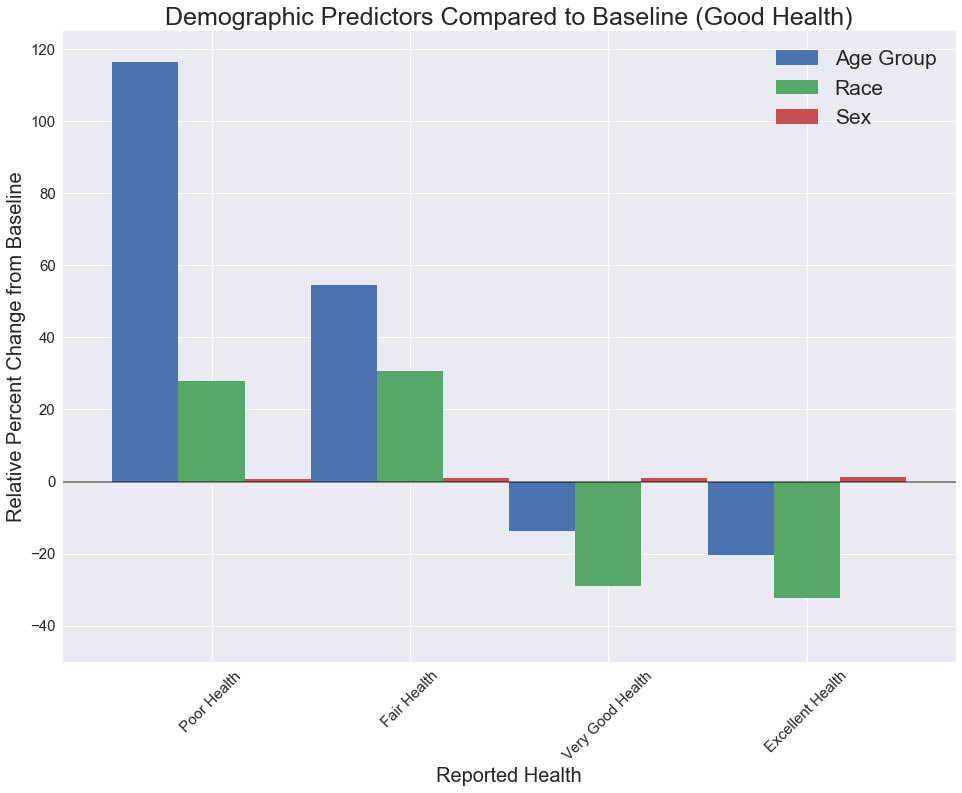

In [12]:
plt.style.use('seaborn')
d_rel_odds.T.plot(kind='bar', figsize=(16, 12),width=1)
plt.title("Demographic Predictors Compared to Baseline (Good Health)", fontsize=25)
plt.xlabel("Reported Health", fontsize=20)
plt.ylabel("Relative Percent Change from Baseline", fontsize=20)
plt.ylim(-50,125)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc="upper right", ncol=1, prop={'size': 21})
plt.hlines(0, -10, 20, alpha=0.5)
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig(f"demo.png")

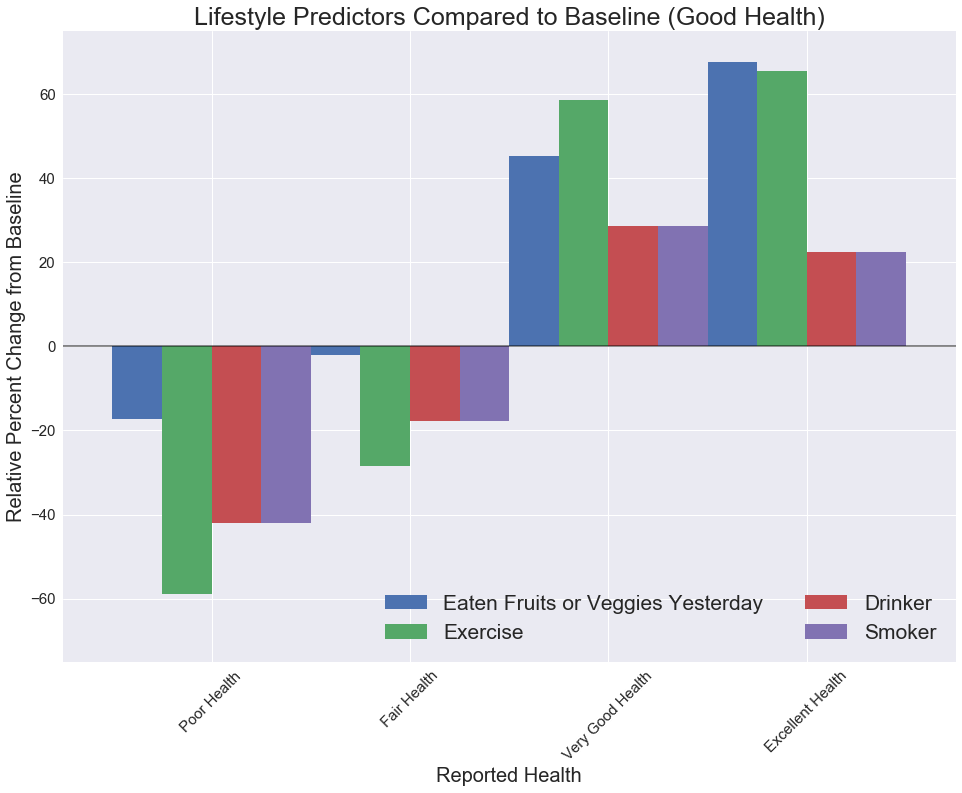

In [15]:
plt.style.use('seaborn')
ls_rel_odds.T.plot(kind='bar', figsize=(16, 12),width=1)
plt.title("Lifestyle Predictors Compared to Baseline (Good Health)", fontsize=25)
plt.xlabel("Reported Health", fontsize=20)
plt.ylabel("Relative Percent Change from Baseline", fontsize=20)
plt.ylim(-75,75)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc="lower right", ncol=2, prop={'size': 21})
plt.hlines(0, -10, 20, alpha=0.5)
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig(f"lifestyle.png")

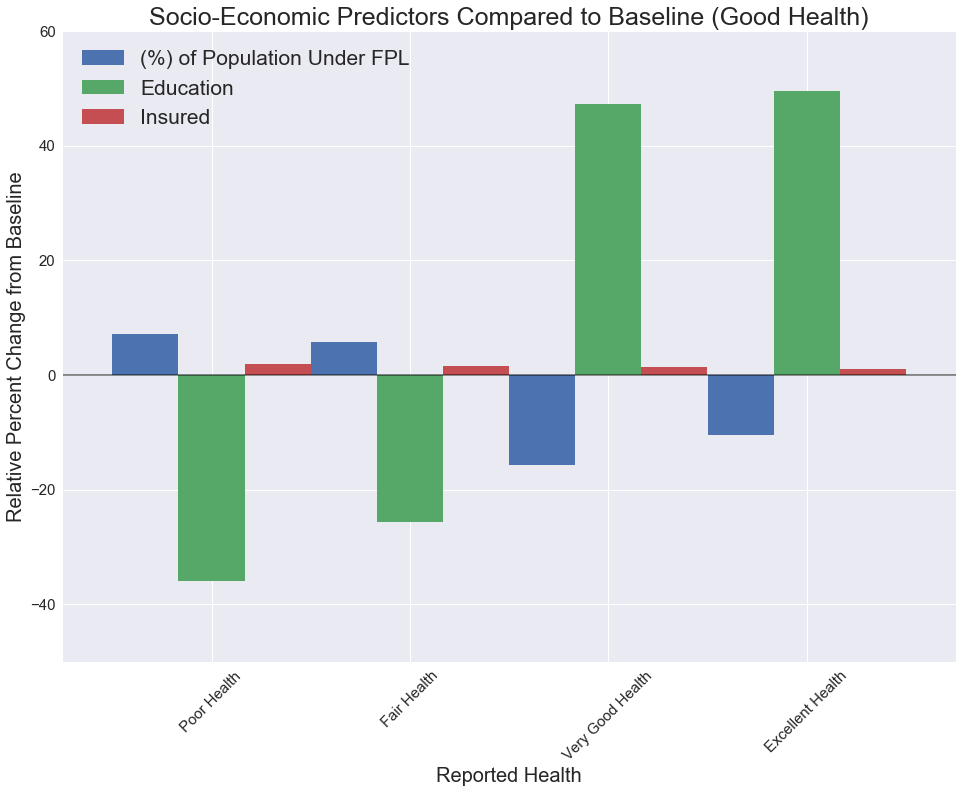

In [16]:
plt.style.use('seaborn')
s_rel_odds.T.plot(kind='bar', figsize=(16, 12),width=1)
plt.title("Socio-Economic Predictors Compared to Baseline (Good Health)", fontsize=25)
plt.xlabel("Reported Health", fontsize=20)
plt.ylabel("Relative Percent Change from Baseline", fontsize=20)
plt.ylim(-50, 60)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.hlines(0, -10, 20, alpha=0.5)
plt.legend(loc="upper left", ncol=1, prop={'size': 21})
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig(f"se.png")